EDA Análisis exploratorio de datos
Importando librerías

In [7]:
import re
#import sketch
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
#import geojson
#import folium
from folium.plugins import HeatMap
from summarytools import dfSummary

Ingesta de datos desde el dataset limpio Homicidio_hechos 

In [44]:
df= pd.read_csv("Homicidios_hechos.csv")
df_victima=pd.read_csv("Homicidios_victimas.csv")
df.head(3)


,Unnamed: 0,Id,Num víctimas,Fecha,Año,Mes,Día,Hora completa,Hora,Lugar del hecho,...,Victima,Acusado,Coordenada x,Coordenada y,ID,OBJETO,Barrios,PERIMETRO,AREA,Día semana
0,0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,...,MOTO,AUTO,98896.782384,93532.434378,12,LIMITE COMUNAL,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,20935.012513,2.221690e+07,Viernes
1,1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,...,AUTO,PASAJEROS,95832.055711,95505.416420,5,LIMITE COMUNAL,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,Sabado
2,2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,...,MOTO,AUTO,106684.290900,99706.576878,14,LIMITE COMUNAL,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,36102.201573,1.779457e+07,Domingo


In [ ]:
df_victima

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             682 non-null    int64  
 1   Id                     682 non-null    object 
 2   Num víctimas           682 non-null    int64  
 3   Fecha                  682 non-null    object 
 4   Año                    682 non-null    int64  
 5   Mes                    682 non-null    int64  
 6   Día                    682 non-null    int64  
 7   Hora completa          682 non-null    object 
 8   Hora                   681 non-null    float64
 9   Lugar del hecho        682 non-null    object 
 10  Tipo de calle          682 non-null    object 
 11  Calle                  682 non-null    object 
 12  Cruce                  525 non-null    object 
 13  Dirección normalizada  682 non-null    object 
 14  Comuna                 682 non-null    object 
 15  Xy (ca

Outliers
Se realiza la busqueda de datos con valores atípicos en las features, y se analiza si es necesario eliminarlos.

In [36]:
print(df['Num víctimas'].unique())
print(df['Num víctimas'].isnull().sum())

[1 2 3]
0


In [8]:
df['Num víctimas'] = pd.to_numeric(df['Num víctimas'], errors='coerce')

In [9]:
print(df['Num víctimas'].isnull().sum())


0


In [10]:
print(df['Num víctimas'].unique())


[1 2 3]


In [11]:
df = df.dropna(subset=['Num víctimas'])


Text(0, 0.5, 'Número de Víctimas')

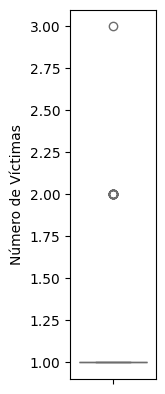

In [37]:
plt.subplot(1, 5, 1)
sns.boxplot(data=df, y='Num víctimas', color="#FA8072")
plt.ylabel('Número de Víctimas')


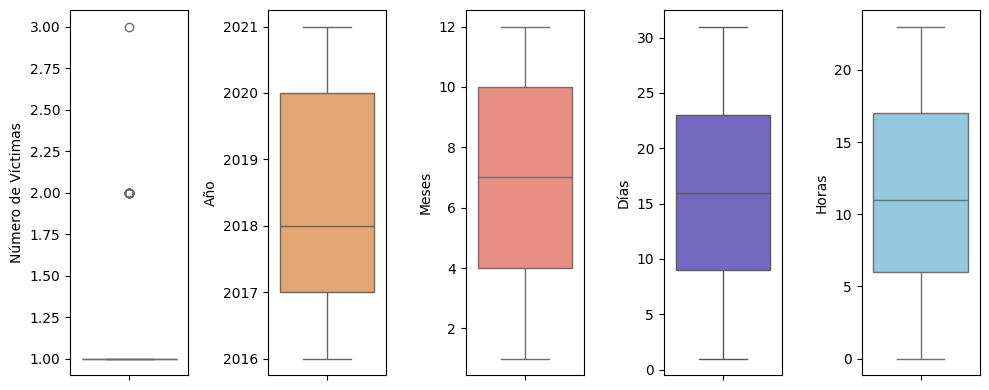

In [15]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df, y='Num víctimas', color = "#FA8072")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df, y='Año', color = "#F4A460")
plt.ylabel('Año')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df, y='Mes', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df, y='Día', color = "#6A5ACD")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df, y='Hora', color = "#87CEEB")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Conclusión
Los Outliers que se encuentran en feature Num víctimas (valores 2 ó 3), se producen debido a que en la mayoria de los casos el registro es el valor uno (1); con respecto a las victimas en los siniestros.

A - Variables Númericas
En el dataset hay variables numéricas ó que contienen números; pero su utilización como tales va a depender del contexto de los datos. En éste caso se utiliza un mapa de correlaciones para examinar si existen, relaciones entre los datos númericos ó se utilizarán como categóricos (en algunos casos), para el correcto análisis

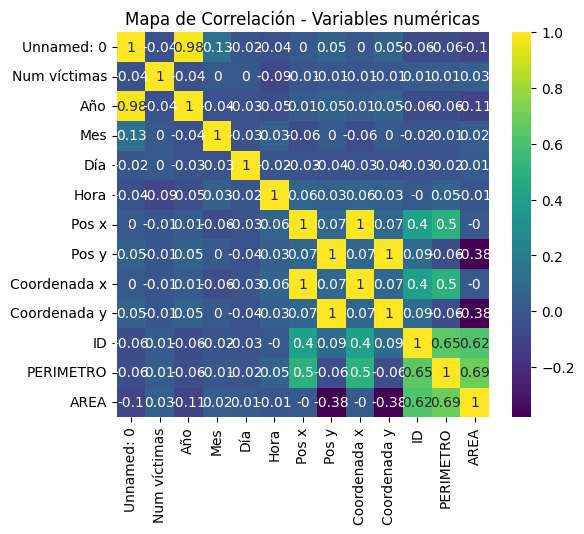

In [16]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

El cruzamiento de todas las variables numéricas en la matriz resulta con relaciones positivas fuertes entre las features Coordenada y Pos, lo que resultaría un dato esperable. Se puede verificar también una correlacíon positiva leve entre la variable Edad y Hora Las demás correlaciones son negativas, hecho que se esperaba debido a que el Num víctimas de un siniestro no se vincula a una fecha u hora puntual.

Debido al objetivo de éste proyecto, que consiste en analizar los siniestros, con el fin de disminuir la cantidad de víctimas fatales; se define comenzar la exploración con la variable Num víctimas.

In [38]:
df["Num víctimas"].describe()

count    682.000000
mean       1.029326
std        0.177325
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num víctimas, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9116\3047984571.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_filtrado, x='Num víctimas', palette="Paired")


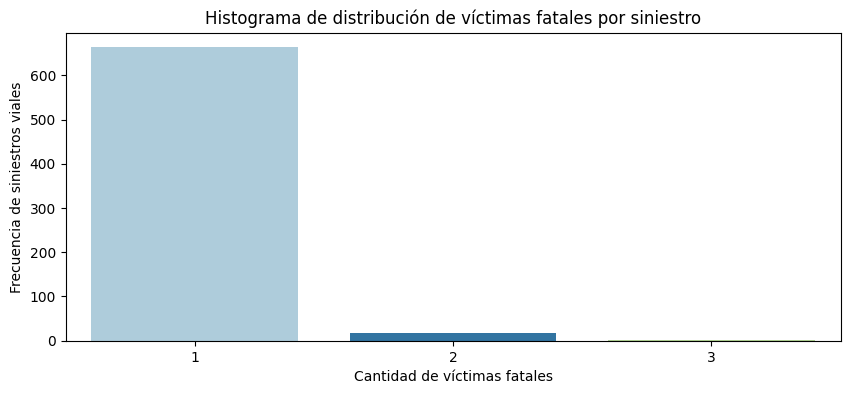

In [18]:
plt.figure(figsize=(10, 4))
# se filtran los valores sin datos o nulos 
df_filtrado = df[df["Num víctimas"] != 0]

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(df_filtrado, x='Num víctimas', palette="Paired")

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

Conclusión
La cantidad de víctimas fatales que arrojan los siniestros viales es de 1 (una), en la mayoría de los casos.
Según los datos estadísticos de la columna el 75% de los siniestros viales tienen 1 víctima.
Rara vez resulta un siniestro con tres víctimas fatales

Relación Num vìctimas con el tiempo - Distribución temporal
Se analizan los datos teniendo en cuenta diferentes horizontes temporales, para corroborar la existencia de algún tipo de evento o patrón importante.

In [19]:
# Agrupar por año y mes, y sumar el número de víctimas
rel_tiempo = df.groupby(['Año', 'Mes'])['Num víctimas'].sum().reset_index()

In [20]:
rel_tiempo

,Año,Mes,Num víctimas
0,2016,1,8
1,2016,2,12
2,2016,3,13
3,2016,4,9
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


In [21]:
#Para la realización del gráfico se transforman los datos a tipo int
rel_tiempo["Año"]= rel_tiempo["Año"].astype("Int64")
rel_tiempo["Mes"]= rel_tiempo["Mes"].astype("Int64")

In [22]:
rel_tiempo

,Año,Mes,Num víctimas
0,2016,1,8
1,2016,2,12
2,2016,3,13
3,2016,4,9
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


In [39]:
# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
rel_tiempo["Fecha"] = rel_tiempo["Año"].astype(str) + '-' + rel_tiempo["Mes"].astype(str)

# Convertir la variable de tiempo a formato datetime
rel_tiempo["Fecha"] = pd.to_datetime(rel_tiempo["Fecha"])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = rel_tiempo.sort_values("Fecha")

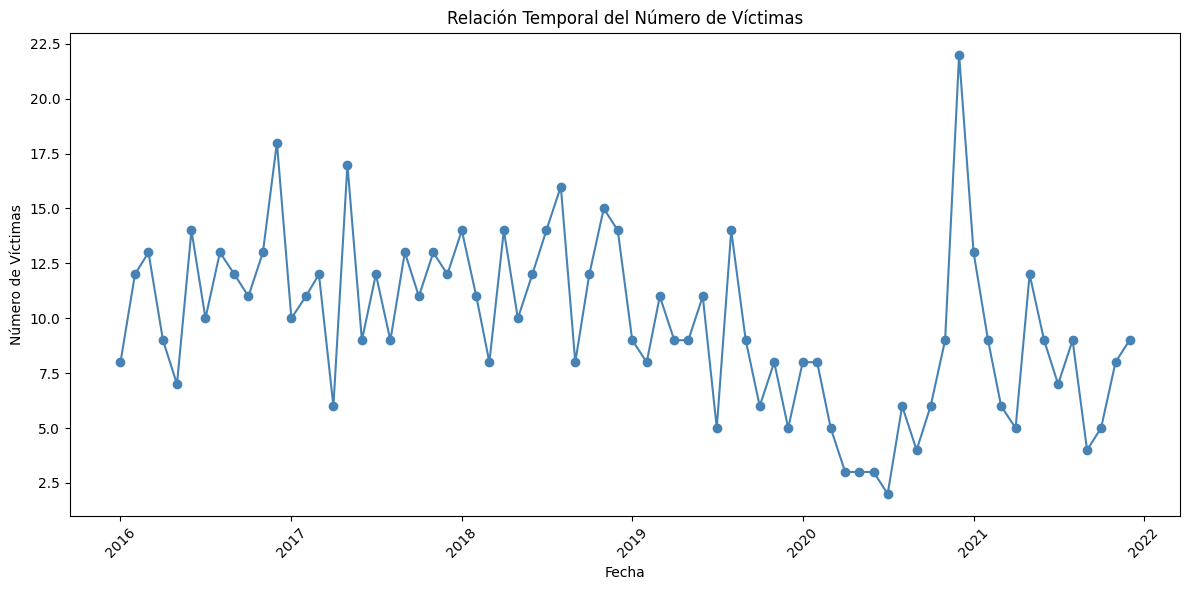

In [24]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(rel_tiempo["Fecha"], rel_tiempo["Num víctimas"], marker='o', color='steelblue')

# Añadir títulos y etiquetas
plt.title('Relación Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Conclusión
En el gráfico de la relación temporal del número de víctimas, se muestra como las fechas con mayor cantidad de siniestros fatales se dan durante 2017 y 2018; luego se percibe una disminución sostenida en los siguientes años. Sólo hubo un pico, a finales de 2020 superando el mayor número de víctimas mesuales a lo largo de los años analizados (26 víctimas fatales).
Durante el año 2020, la llegada de la pandemia COVID19; influyó notablemente en las estadísticas de siniestros viales

Distribución temporal de víctimas

Distribución mensual de víctimas fatales

Se crea un gráfico de barras que muestra la cantidad de víctimas por mes y agrega etiquetas de número de víctimas en cada barra.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9116\1122299638.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Mes', y='Num víctimas', data=data, palette="winter")


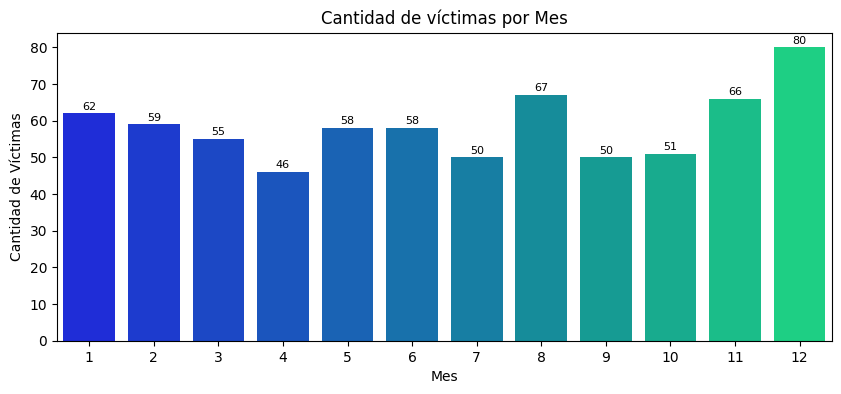

In [25]:
# Se agrupa por la cantidad de víctimas por mes
data = df.groupby(['Mes'])['Num víctimas'].sum().reset_index()
data["Mes"]=data["Mes"].astype("Int64")

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Mes', y='Num víctimas', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Distribución diaria de víctimas fatales
Se crea un gráfico de barras que muestra la cantidad de víctimas por día y agrega etiquetas de número de víctimas en cada barra

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9116\4138652479.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Día', y='Num víctimas', data=data, palette="winter")


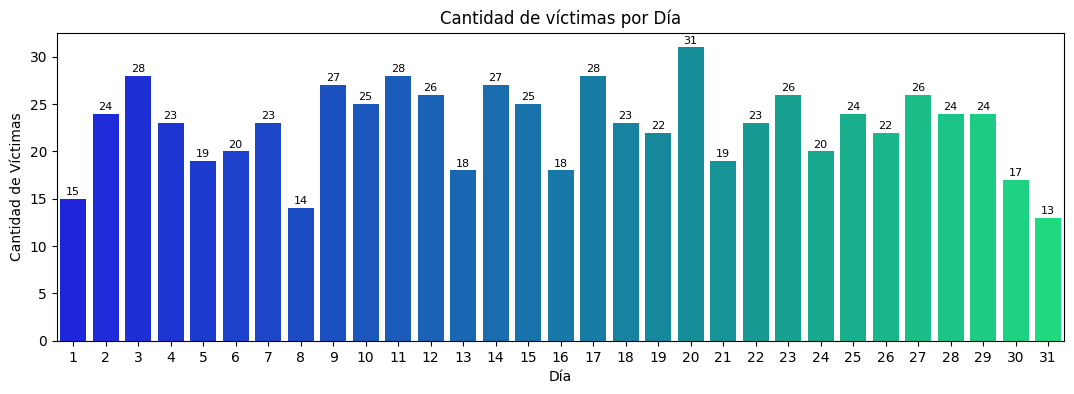

In [26]:
# Se agrupa por la cantidad de víctimas por dia
data = df.groupby(['Día'])['Num víctimas'].sum().reset_index()
data["Día"]=data["Día"].astype("Int64")

# Se grafica
plt.figure(figsize=(13,4))

ax = sns.barplot(x='Día', y='Num víctimas', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Día')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Se crea un gráfico de barras que muestra la cantidad de víctimas por día de la semana y agrega etiquetas de número de víctimas en cada barra.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9116\1192124948.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Día semana', y='Num víctimas', data=data, palette="winter")


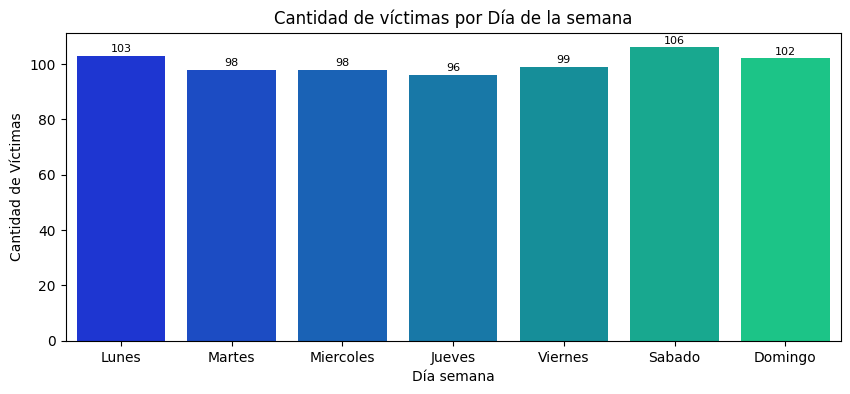

In [27]:
# Se agrupa por la cantidad de víctimas por dia semana
data = df.groupby(['Día semana'])['Num víctimas'].sum().reset_index()


# Define el orden de los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Crea una columna 'Orden_dia_semana' en el DataFrame para representar el orden numérico de los días de la semana
data['Orden_dia_semana'] = data['Día semana'].apply(lambda x: orden_dias_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='Orden_dia_semana')



# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Día semana', y='Num víctimas', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día semana') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()


Distribución relacionando horas y días, de víctimas fatales
Se crea un mapa de calor donde el eje x representa las horas del día, el eje y representa los días de la semana y el color de cada celda indica el número de víctimas. Se utiliza Seaborn para crear el mapa de calor y el argumento annot=True agrega los valores numéricos en las celdas del mapa de calor.

Distribución de Participantes en los siniestros

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9116\3601797418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x="Participantes", palette="winter")


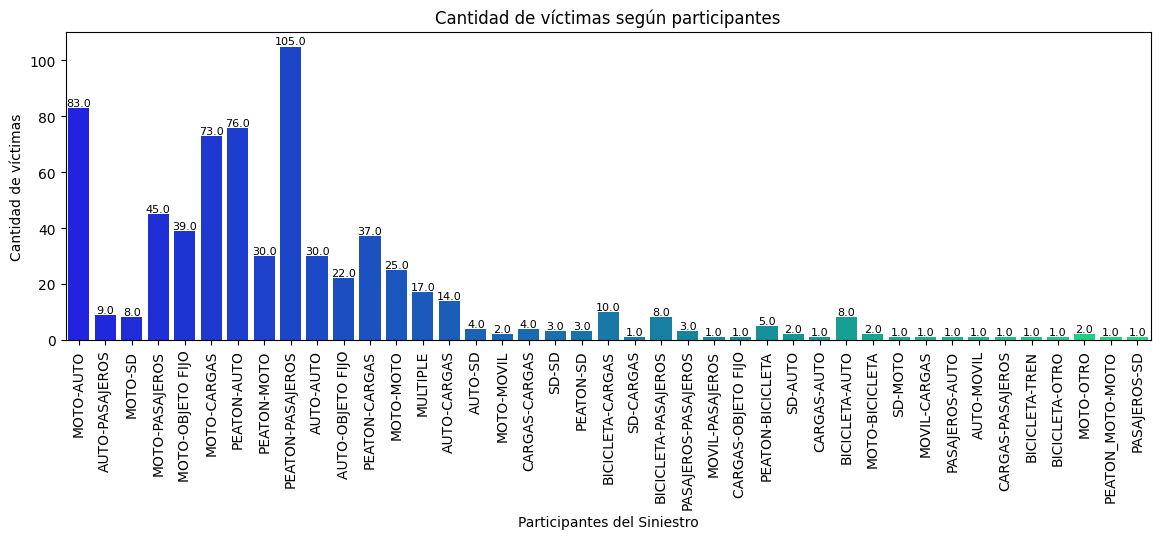

In [28]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Participantes", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se ubican los titulos de las barras en 90 grados
plt.xticks(rotation=90)

#Se titulan los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

Conclusión
Los valores de participación que concentran más víctimas están en PEATON-PASAJEROS, esto según el diccionario de datos, se refiere a Peatón: es cualquier víctima distinta de cualquier ocupante de un vehículo; Pasajero: es cualquier persona que se encuentra dentro, descendiendo o ascendiendo del transporte público u omnibús de larga distancia.
Le siguen en importancia de víctimas MOTO-AUTO , PEATON-AUTO y MOTO-CARGAS
En la columna Participantes puede interpretarse que la primer palabra se relaciona a quien fue la Víctima y la segunda palabra se refiere al Acusado

Distribución de Acusados en los siniestros

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9116\2202415886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x="Acusado", palette="winter")


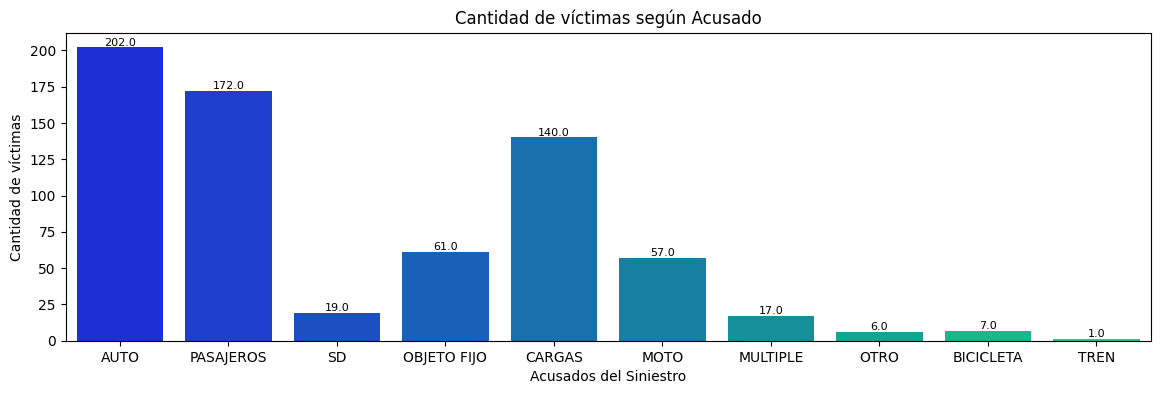

In [29]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Acusado", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

Conclusión
Se puede visualizar que los que causan más víctimas son los Autos, Cargas y Pasajeros. Esto se relaciona con el punto anterior.

Distribución de Víctimas en los siniestros

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9116\3606964637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x="Victima", palette="winter")


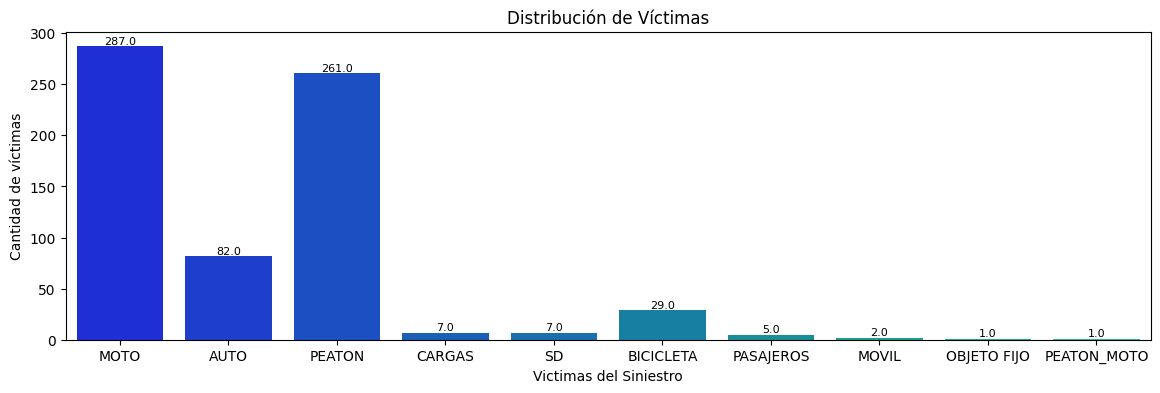

In [30]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Victima", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

Conclusión
Se puede visualizar que las víctimas son Moto, Peaton y Carga. Esto se relaciona con ambos puntos anteriores.
Matriz de confusión

In [31]:
tabla_contingencia = pd.crosstab(df['Victima'], df['Acusado'])


In [32]:
# Visualizar la tabla de contingencia
tabla_contingencia

Acusado,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,SD,TREN
Victima,,,,,,,,,,
AUTO,30,0,14,0,3,21,1,9,4,0
BICICLETA,8,0,10,0,1,0,1,8,0,1
CARGAS,1,0,4,0,0,1,0,1,0,0
MOTO,83,2,73,25,8,39,4,45,8,0
MOVIL,0,0,1,0,0,0,0,1,0,0
OBJETO FIJO,1,0,0,0,0,0,0,0,0,0
PASAJEROS,1,0,0,0,0,0,0,3,1,0
PEATON,76,5,37,30,5,0,0,105,3,0
PEATON_MOTO,0,0,0,1,0,0,0,0,0,0


Proporción de víctimas por Sexo
df

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

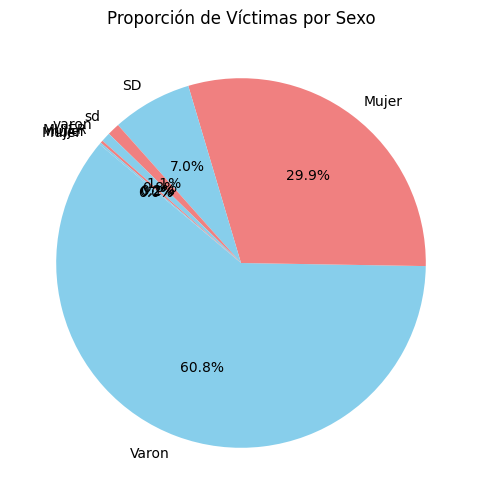

In [51]:
# Calcular la proporción de víctimas por sexo
proporcion = df_victima['Sexo'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Sexo')

Distribución de los roles de las víctimas por Sexo